## EXERCICE : BOOTSTRAPPING : UNE METHODE DE REECHANTIONNAGE 

In [29]:
from warnings import filterwarnings
filterwarnings('ignore')  # code optionnel

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')  # le style ggplot est un paquege de R pour affiné les graphique

# ?pd.pivot_table

## EXERCICE 1

Supposons que vous possédiez une usine qui produit des clés. Vous voulez connaître la longueur moyenne des clés et vous assurer qu'elles répondent à certaines spécifications. Votre usine produit des milliers de clés chaque jour, mais il est impossible de mesurer la longueur de chaque clé. Cependant, vous avez accès à un échantillon représentatif de 100 clés.

Utilisez la méthode Bootstrapping pour obtenir l'intervalle de confiance (IC) à 95% de la longueur moyenne des clés.

Que pouvez-vous dire sur la description probabiliste des données ? Construisez un graphique pour appuyer votre

commentaire.

In [31]:
# Echantilllon representatrice des 100 clés

Longueur_cles = np.array([8.9143694,10.99734545, 10.2829785 ,8.49370529,9.42139975,11.65143654,7.57332076,9.57108737, 
                          11.26593626,9.13325969,9.32111385,9.90529103, 11.49138963,9.3610989,9.55601804,9.56564872, 12.20593008,
                          12.18678609, 11.0040539 , 10.3861864 ,10.73736858, 11.49073203,9.06416613, 11.17582904, 8.74611933,
                          9.3622485, 10.9071052,8.5713193,9.85993128,9.1382451,9.74438063,7.20141089,8.2284669,9.30012277,
                          10.92746243,9.82636432, 10.00284592, 10.68822271,9.12046366, 10.28362732,9.19463348, 8.27233051, 
                          9.60910021, 10.57380586, 10.33858905,9.98816951, 12.39236527, 10.41291216, 10.97873601, 
                          12.23814334,8.70591468,8.96121179, 11.74371223,9.20193726, 10.02968323,11.06931597, 10.89070639,
                          11.75488618,11.49564414, 11.06939267,9.22729129, 10.79486267, 10.31427199,8.67373454,11.41729905,
                          10.80723653, 10.04549008, 9.76690794,8.80169886, 10.19952407,10.46843912, 9.16884502, 11.16220405,
                          8.90279695,7.87689965,11.03972709,11.25523737,9.59663396,9.87397041,9.16248328,8.39403724,
                          9.31113102, 11.66095249,8.914097610,10.80730819,9.68524185,9.26753801,8.78747687,12.08711336,
                          10.16444123, 9.22729129, 10.79486267, 10.31427199, 8.67373454, 11.41729905,10.80723653, 
                          10.04549008, 9.76690794,8.80169886, 10.19952407,10.46843912,9.16884502, 11.16220405,8.90279695, 
                          7.87689965,11.03972709, 9.59663396, 9.87397041, 9.16248328, 8.39403724,11.25523737, 9.31113102, 
                          11.66095249, 10.80730819, 9.68524185,8.9140976,9.26753801, 8.78747687, 12.08711336, 10.16444123,
                          11.15020554,8.73264795, 10.18103513, 11.17786194, 9.66498924,11.03111446, 8.91543209, 8.63652846, 
                          10.37940061, 9.62082357])

In [32]:
# Fonction pour generer plusieurs replique bootstrap

def compute_boots_repliqs(data, function, size = 1):    # function ICI peu etre la fonction mean ou std (ex: np.std)
                                                         # mettre en paramettre la fonction (ex: np.std ou np.mean  etc)
    boots_repliqs = np.empty(size)
    
    for i in range(size):
        boots_repliqs[i] = function(np.random.choice(data, len(data))) # function ici peu etre la fonction mean ou std 
                                                                      # (ex: np.std ou np.mean  etc)
    return boots_repliqs

In [33]:
# Calcul de l'intervalle de confiance a 95%

mean_boots = compute_boots_repliqs(Longueur_cles, np.mean, size = 100000)  # j'ai enregistrer dans une liste mean_boots

intervalle_confiance = np.percentile(mean_boots, [2.5, 97.5])

intervalle_confiance

# L'intervalle de confiance de la longueur moyenne d'une clé est de [ 9.81256289, 10.19294938]

array([ 9.81157451, 10.19302282])

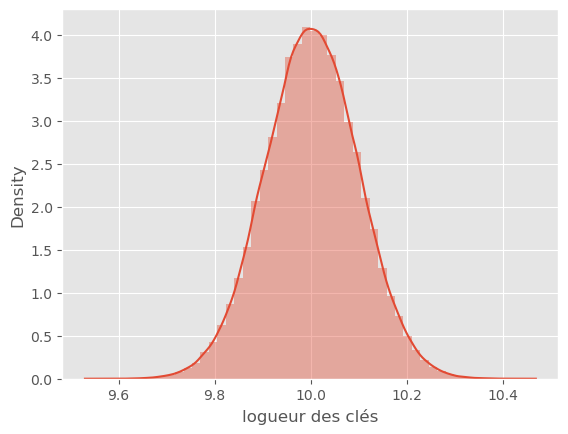

In [34]:
# graphique de description probaliste des données et commentaire

sns.distplot(mean_boots)

plt.xlabel("logueur des clés")

plt.show()

La distribution des repliques bootstrap de la moyenne logueur de la clé suit parfaitement une loi normal avec une forme en cloche.

## EXERCICE 2

In [35]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

pour ullustrer la technique de bootstrapping, nous utiliserons les données "geyser" du celebre jeu de données seaborn

In [36]:
geyser_df = sns.load_dataset('geyser')
geyser_df

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


In [37]:
# Calculer l'intervalle de confiance à 95% du poids median

np.percentile(compute_boots_repliqs(geyser_df['waiting'], np.median, size = 10000), [2.5, 97.5])

array([73.5, 77. ])

 L'IMC est égale au poids en Kg divisé par le carré de la taille en m. ses valeurs je vais uliser son pas réel. 
 c'est pour apprendre a calculer et diviser par le metre carré

In [38]:
# Calculer l'intervalle de confiance à 95% de L'IMC moyen

geyser_df['IMC'] = geyser_df['duration'] / (geyser_df['waiting']*0.01)**2
geyser_df.head()

,duration,waiting,kind,IMC
0,3.600,79,long,5.768306
1,1.800,54,short,6.172840
2,3.333,74,long,6.086560
3,2.283,62,short,5.939126
4,4.533,85,long,6.274048


In [39]:
# Calculer l'intervalle de confiance à 95% de L'IMC moyen

np.percentile(compute_boots_repliqs(geyser_df['IMC'], np.mean, size = 10000), [2.5, 97.5])

array([6.73763513, 7.02228454])

In [40]:
# Calculer l'intervalle de confiance à 95% de L'IMC Ecart-type

np.percentile(compute_boots_repliqs(geyser_df['IMC'], np.std, size = 10000), [2.5, 97.5])

array([1.09075662, 1.30242091])